In [1156]:
import numpy as np
import pandas as pd

In [1157]:
data = pd.read_csv("ml_final.csv")

In [1158]:
data.head()

,sex,exang,slope,ca,is_cp,st_target,c_age,c_oldpeak,c_thal,c_bps,c_chol,c_hr,c_ecg
0,m,0,1,1,no,no,old,high,3,high,mid,low,0
1,f,0,2,0,yes,yes,old,low,2,high,low,low,1
2,m,0,1,0,yes,no,old,low,3,very high,high,mid,0
3,m,0,1,1,yes,no,old,high,2,high,high,high,0
4,m,0,2,0,no,yes,old,low,3,high,low,low,1


In [1159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])
data['is_cp'] = le.fit_transform(data['is_cp'])
data['st_target'] = le.fit_transform(data['st_target'])
data['c_age'] = le.fit_transform(data['c_age'])
data['c_oldpeak'] = le.fit_transform(data['c_oldpeak'])
data['c_thal'] = le.fit_transform(data['c_thal'])
data['c_bps'] = le.fit_transform(data['c_bps'])
data['c_chol'] = le.fit_transform(data['c_chol'])
data['c_hr'] = le.fit_transform(data['c_hr'])
data['c_ecg'] = le.fit_transform(data['c_ecg'])







In [1160]:
data.head()

,sex,exang,slope,ca,is_cp,st_target,c_age,c_oldpeak,c_thal,c_bps,c_chol,c_hr,c_ecg
0,1,0,1,1,0,0,1,0,2,0,2,1,0
1,0,0,2,0,1,1,1,1,1,0,1,1,1
2,1,0,1,0,1,0,1,1,2,2,0,2,0
3,1,0,1,1,1,0,1,0,1,0,0,0,0
4,1,0,2,0,0,1,1,1,2,0,1,1,1


In [1161]:
data['slope'].unique()
x = data.iloc[:,[0,1,3,4,6,12]].values
y = data.iloc[:,5:6].values


In [1162]:
x

array([[1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 1, 0],
       ...,
       [0, 0, 2, 1, 1, 1],
       [1, 1, 3, 1, 1, 1],
       [0, 0, 3, 0, 1, 0]], dtype=int64)

In [1163]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()

#f_arr = one.fit_transform(data[['slope','c_oldpeak','c_thal','c_bps','c_chol','c_hr']]).toarray()
f_arr = one.fit_transform(data[['slope','c_oldpeak','c_thal','c_bps','c_hr']]).toarray()



In [1164]:
td = np.concatenate((x,f_arr), axis=1)

In [1165]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(td,y,test_size = 0.2, random_state = 0)

In [1166]:
from sklearn.ensemble import RandomForestClassifier
rrc = RandomForestClassifier(n_estimators = 170, criterion = 'entropy',random_state = 0)

In [1167]:
rrc.fit(x_train,y_train)

<ipython-input-1167-3eeefc086734>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rrc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=170, random_state=0)

In [1168]:
y_pred1 = rrc.predict(x_test)

In [1169]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8852459016393442

In [1170]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred1)
cm

array([[30,  4],
       [ 3, 24]], dtype=int64)

In [1171]:
import sklearn.metrics as metrics
fpr,tpr ,Threshold = metrics.roc_curve(y_test,y_pred1)
roc_auc = metrics.auc(fpr,tpr)

Text(0.5, 0, 'fpr')

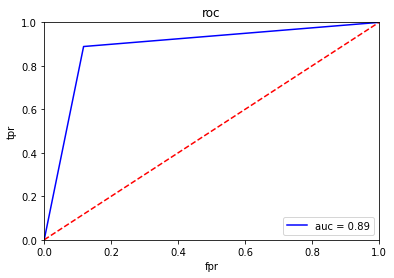

In [1172]:
import matplotlib.pyplot as plt
plt.title('roc')
plt.plot(fpr,tpr,'b',label = 'auc = %0.2f'%roc_auc)
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("tpr")
plt.xlabel('fpr')

In [1173]:
x_train.shape

(242, 20)

In [1174]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ntr = sc.fit_transform(x_train)
X_nte = sc.transform(x_test)

In [1175]:
X_ntr.shape

(242, 20)

In [1176]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

model = Sequential([
    Dense(20,activation = "relu", input_shape=(20,)),
    Dense(10, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

In [1177]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [1178]:
model.fit(x_train,y_train,epochs = 50, batch_size = 10)

Epoch 1/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6446
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6009 - accuracy: 0.7025
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.7603
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.7893
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.8099
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8099
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8140
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8140
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8306
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.8347
Epoch 11/50
25/25 [

In [1179]:
y_pred2 = model.predict(x_test)

In [1180]:
y_pred2.shape

(61, 1)

In [1181]:
for i in range(y_pred2.shape[0]):
    if y_pred2[i] <= 0.5:
        y_pred2[i] = 0
    else:
        y_pred2[i] = 1

In [1182]:
y_pred2

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [1183]:
accuracy_score(y_test,y_pred2)

0.8524590163934426

In [1184]:
cm = confusion_matrix(y_test,y_pred2)
import sklearn.metrics as metrics
fpr,tpr ,Threshold = metrics.roc_curve(y_test,y_pred2)
roc_auc = metrics.auc(fpr,tpr)

Text(0.5, 0, 'fpr')

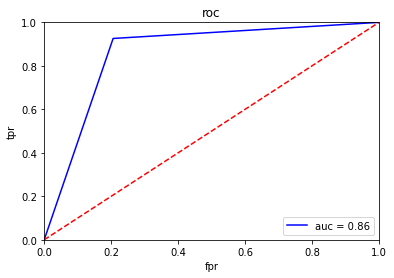

In [1185]:
plt.title('roc')
plt.plot(fpr,tpr,'b',label = 'auc = %0.2f'%roc_auc)
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("tpr")
plt.xlabel('fpr')